In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

C:\Users\Cameron\AppData\Local\Temp\ipykernel_11760\2286637145.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# DATA 200 Midterm Project
20th February 2024
Syed Atif 200679450
Gbone Atsagbede 203359820
Tharun Indrakaumar 210731980
Cameron Zhang 210740160

### Introduction
This notebook contains the code for the data analysis and visualization of the Hansard dataset provided at https://www.lipad.ca/data/ and the greenhouse gas emissions dataset provided at https://www.kaggle.com/datasets/narimanissin94/greenhousegas-emissions-across-canada. The hansard dataset contains the transcripts of the Canadian Parliament from 1901 to 2019. The greenhouse gas emissions dataset contains the greenhouse gas emissions from 2004 to 2020. The goal of this project is to determine if the carbon tax policy in Canada has a significant impact on the reduction of greenhouse gas emissions.

### Table of Contents
1. [Data Cleaning](#Data-Cleaning)
2. [Data Analysis](#Data-Analysis)
3. [Data Visualization](#Data-Visualization)
4. [Conclusion](#Conclusion)

#### Does carbon tax policy in Canada have a significant impact on the reduction of greenhouse gas emissions?

The goal set by Canada is a 40%-45% reduction in greenhouse gas emissions by 2030. The carbon tax policy was implemented in 2019 to help achieve this goal. The carbon tax policy is a tax on the carbon content of fossil fuels. The tax is intended to reduce greenhouse gas emissions by increasing the cost of emitting carbon dioxide. The tax is expected to reduce emissions by encouraging businesses and individuals to use less fossil fuels. The carbon tax policy is a controversial policy and has been a topic of debate in the Canadian Parliament. The goal of this project is to determine if the carbon tax policy in Canada has a significant impact on the reduction of greenhouse gas emissions.

<h1>CARBON DATASET</h1>

In [3]:
#load ghg dataset
carbon_df = pd.read_csv('PDGES-GHGRP-GHGEmissionsGES-2004-Present (1).csv', encoding='latin-1')
carbon_df.head()

,GHGRP ID / Numéro d'identification de PDGES,Reference Year / Année de référence,Facility Name / Nom de l'installation,Facility Location / Emplacement de l'installation,Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation,Facility Province or Territory / Province ou territoire de l'installation,Facility Postal Code / Code postal de l'installation,Latitude,Longitude,Facility NPRI ID / Numéro d'identification de l'INRP,...,C4F8 (tonnes),C4F8 (tonnes CO2e / tonnes éq. CO2),C5F12 (tonnes),C5F12 (tonnes CO2e / tonnes éq. CO2),C6F14 (tonnes),C6F14 (tonnes CO2e / tonnes éq. CO2),PFC Total (tonnes CO2e / tonnes éq. CO2),SF6 (tonnes),SF6 (tonnes CO2e / tonnes éq. CO2),Total Emissions (tonnes CO2e) / Émissions totales (tonnes éq. CO2)
0,G10001,2020,Division Alma,1100 Melanion Street,Alma,Quebec,G8B 5W2,48.56500,-71.65556,983.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,7.779969e+04
1,G10003,2020,"Foothills Pipeline, Alberta",NaN,Airdrie,Alberta,T4A 2G7,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,2.878482e+05
2,G10004,2020,Kingston CoGen,5146 Taylor-Kidd Boulevard,Bath,Ontario,K0H 1G0,44.20950,-76.72460,5765.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,3.237168e+02
3,G10006,2020,Redwater Fertilizer Operations,56225 SH643,Sturgeon County,Alberta,T0A 2W0,53.84200,-113.09300,2134.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,1.091022e+06
4,G10007,2020,Alberta Envirofuels,9511 17 Street Northwest,Edmonton,Alberta,T6P 1Y3,53.53199,-113.36492,3974.0,...,0.0,0.0,0,0,0,0,0.0,NaN,NaN,3.016439e+05


In [4]:
#get summarized info
carbon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13093 entries, 0 to 13092
Data columns (total 77 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   GHGRP ID / Numéro d'identification de PDGES                                                                                      13093 non-null  object 
 1   Reference Year / Année de référence                                                                                              13093 non-null  int64  
 2   Facility Name / Nom de l'installation                                                                                            13093 non-null  object 
 3   Facility Location / Emplacement de l'installation                                               

In [5]:
#only take years from 2014 to 2019 (inclusive)
carbon_df = carbon_df[(carbon_df['Reference Year / Année de référence'] >= 2015) & (carbon_df['Reference Year / Année de référence'] <= 2019)]

In [6]:
#select relevant columns
carbon_df = carbon_df.iloc[:,[1,5,26]]
carbon_df.head()

,Reference Year / Année de référence,Facility Province or Territory / Province ou territoire de l'installation,CO2 (tonnes)
1703,2019,Quebec,7.143435e+04
1704,2019,Alberta,3.740449e+05
1705,2019,Ontario,9.745530e+02
1706,2019,Alberta,1.143131e+06
1707,2019,Alberta,2.648890e+05


In [7]:
#rename columns for ease
carbon_df = carbon_df.rename(columns={"Reference Year / Année de référence": "year",
                                     "Facility Province or Territory / Province ou territoire de l'installation": "province",
                                     "CO2 (tonnes)": "co2_tonnes"})
carbon_df.head()

,year,province,co2_tonnes
1703,2019,Quebec,7.143435e+04
1704,2019,Alberta,3.740449e+05
1705,2019,Ontario,9.745530e+02
1706,2019,Alberta,1.143131e+06
1707,2019,Alberta,2.648890e+05


In [8]:
#fill in which federal party ruled each province in different years
carbon_df["federal_party"] = ["a"]*len(carbon_df.year)

carbon_df.loc[carbon_df.province == "Alberta", "federal_party"] = "Conservative"

carbon_df.loc[carbon_df.province == "Ontario", "federal_party"] = "Liberal"

carbon_df.loc[(carbon_df.province == "Quebec") & (carbon_df.year >= 2015), "federal_party"] = "Liberal"
carbon_df.loc[(carbon_df.province == "Quebec") & (carbon_df.year == 2019), "federal_party"] = "Bloc"

carbon_df.loc[carbon_df.province == "British Columbia", "federal_party"] = "Liberal"

carbon_df.loc[(carbon_df.province == "New Brunswick") & (carbon_df.year >= 2015), "federal_party"] = "Liberal"
carbon_df.loc[(carbon_df.province == "New Brunswick") & (carbon_df.year == 2019), "federal_party"] = "Conservative"

carbon_df.loc[carbon_df.province == "Saskatchewan", "federal_party"] = "Conservative"

carbon_df.loc[carbon_df.province == "Manitoba", "federal_party"] = "Conservative"

carbon_df.loc[carbon_df.province == "Nova Scotia", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Newfoundland and Labrador", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Prince Edward Island", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Yukon", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Northwest Territories", "federal_party"] = "Liberal"

carbon_df.loc[carbon_df.province == "Nunavut", "federal_party"] = "NDP"

carbon_df.head()

,year,province,co2_tonnes,federal_party
1703,2019,Quebec,7.143435e+04,Bloc
1704,2019,Alberta,3.740449e+05,Conservative
1705,2019,Ontario,9.745530e+02,Liberal
1706,2019,Alberta,1.143131e+06,Conservative
1707,2019,Alberta,2.648890e+05,Conservative


In [9]:
#group emissions by year, province and party
grouped = carbon_df.groupby(['year', 'province', 'federal_party']).sum()
new_carbon_df = grouped.reset_index() #turn index into columns
new_carbon_df.head()

,year,province,federal_party,co2_tonnes
0,2015,Alberta,Conservative,1.360464e+08
1,2015,British Columbia,Liberal,1.191452e+07
2,2015,Manitoba,Conservative,1.490384e+06
3,2015,New Brunswick,Liberal,7.146915e+06
4,2015,Newfoundland and Labrador,Liberal,4.673263e+06


In [10]:
#scale CO2 emissions to something more reasonable
new_carbon_df['emissions'] = new_carbon_df.co2_tonnes/100000000
new_carbon_df.head()

,year,province,federal_party,co2_tonnes,emissions
0,2015,Alberta,Conservative,1.360464e+08,1.360464
1,2015,British Columbia,Liberal,1.191452e+07,0.119145
2,2015,Manitoba,Conservative,1.490384e+06,0.014904
3,2015,New Brunswick,Liberal,7.146915e+06,0.071469
4,2015,Newfoundland and Labrador,Liberal,4.673263e+06,0.046733


Text(0.5, 1.0, 'Annual CO2 Emissions for Canada (2015-2019)')

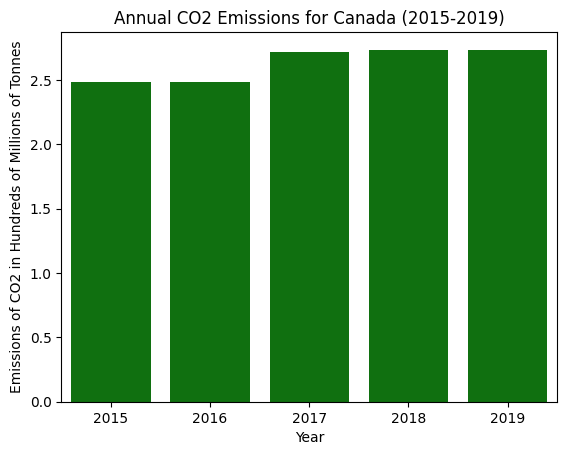

In [11]:
#plot emissions vs year
a = new_carbon_df.groupby('year').sum().reset_index()
sns.barplot(data=a, x='year', y='emissions', color='green')
plt.ylabel("Emissions of CO2 in Hundreds of Millions of Tonnes")
plt.xlabel("Year")
plt.title('Annual CO2 Emissions for Canada (2015-2019)')

Looking at the plot above, we can see that CO2 emissions in Canada increased from 2016 to 2017, but have otherwise remained relatively stable.

Text(120.72222222222221, 0.5, 'Year')

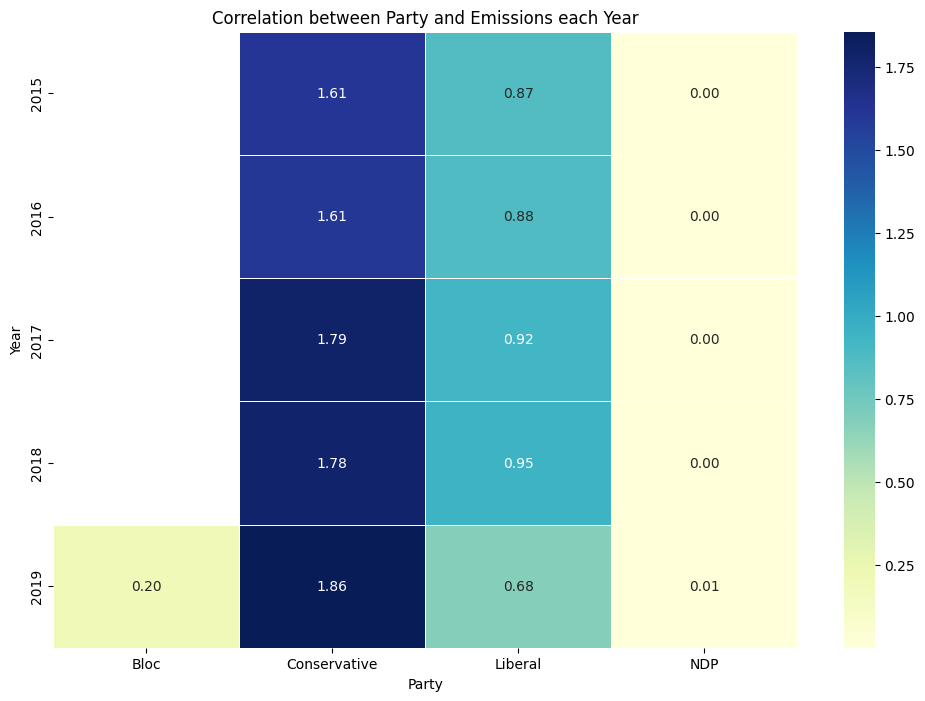

In [12]:
pivot_table = new_carbon_df.pivot_table(values='emissions', index='year', columns='federal_party', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation between Party and Emissions each Year')
plt.xlabel('Party')
plt.ylabel('Year')


We can see that year over year, the emissions have been increasing, mainly in 2017, and most of the emissions are correlated to the Conservative Party.

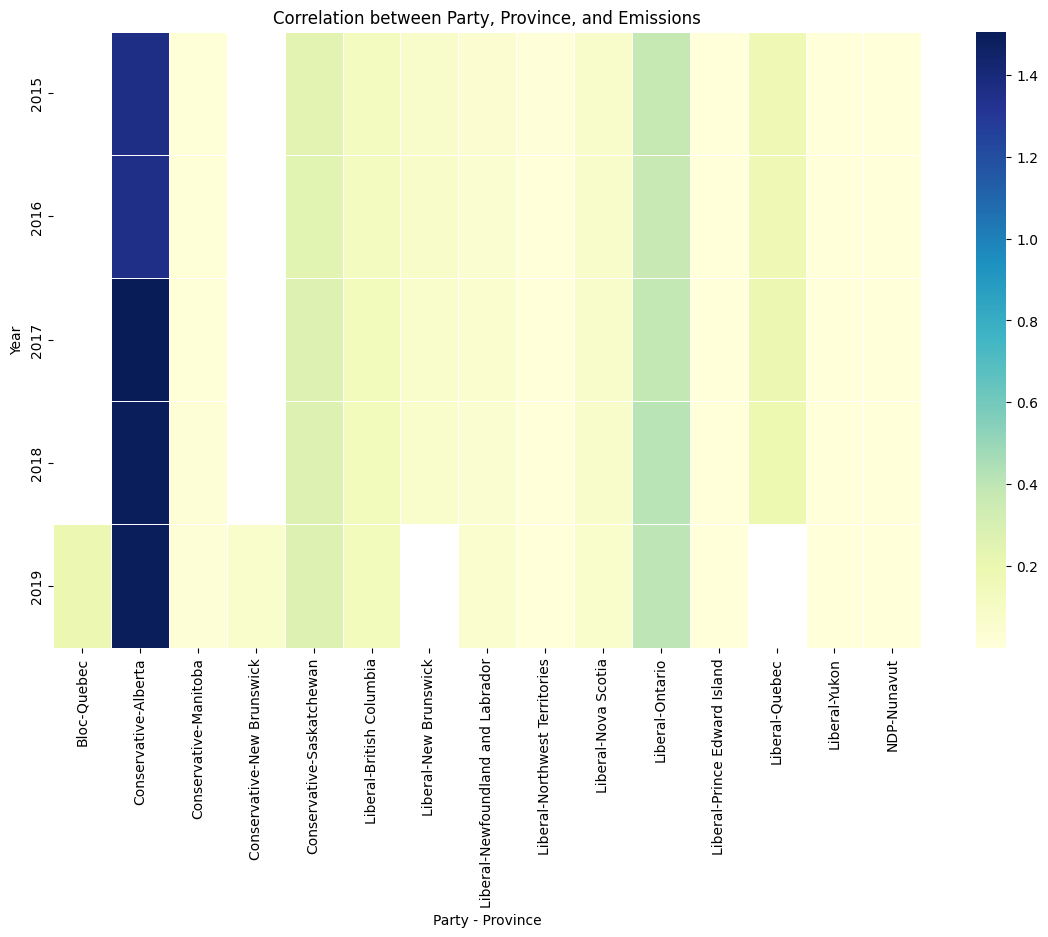

In [13]:
pivot_table = new_carbon_df.pivot_table(values='emissions', index='year', columns=['federal_party', 'province'], aggfunc='sum')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation between Party, Province, and Emissions')
plt.xlabel('Party - Province')
plt.ylabel('Year')
plt.show()

The breakdown by province shows that Alberta has the highest emissions, followed by Ontario and Quebec. This is likely due to the fact that Alberta is home to the oil sands, which are a major source of greenhouse gas emissions.

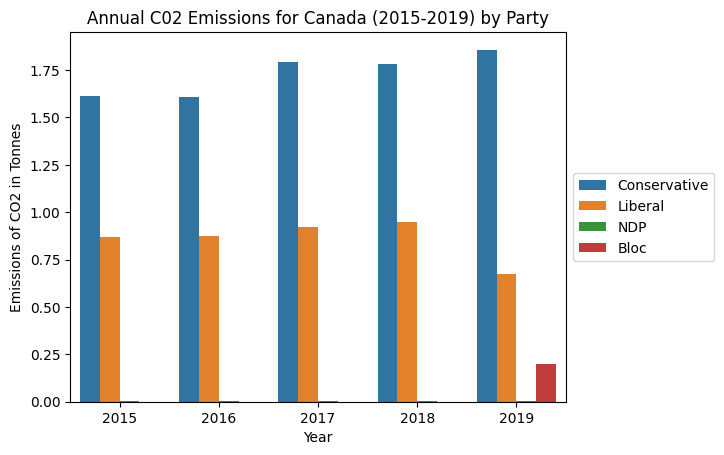

In [14]:
#plot party-qise emissions vs year
a = new_carbon_df.groupby(['year', 'federal_party']).sum().reset_index()
sns.barplot(data=a, x='year', y='emissions', hue='federal_party', errorbar=None)
plt.ylabel("Emissions of CO2 in Tonnes")
plt.xlabel("Year")
plt.title('Annual C02 Emissions for Canada (2015-2019) by Party')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

We can see that year over year, the emissions have been increasing or relatively unchanged, mainly in 2017, and most of the emissions are correlated to the Conservative Party with the Liberal Party following up.

<h1>PARLIAMENT DATASET</h1>

In [15]:
#combine all parliament datasets together
path = 'parl-csv/'
files = os.listdir(path)

df = pd.read_csv(path + files.pop(0))
for f in files:
    df2 = pd.read_csv(path + f)
    df = pd.concat([df, df2], axis=0)
    
df2=None
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.head()

,basepk,hid,speechdate,pid,opid,speakeroldname,speakerposition,maintopic,subtopic,subsubtopic,speechtext,speakerparty,speakerriding,speakername,speakerurl
0,4624060,ca.proc.d.2015-01-26.16574.0,2015-01-26,6519cfba-0080-419d-baa9-8ae6e56d032f,256.0,The Speaker,NaN,NaN,Vacancy,Sudbury,It is my duty to inform the House that a vacan...,Conservative,Regina--Qu'Appelle,Andrew Scheer,http://www.parl.gc.ca/parlinfo/Files/Parliamen...
1,4624061,ca.proc.d.2015-01-26.16574.1,2015-01-26,6519cfba-0080-419d-baa9-8ae6e56d032f,256.0,The Speaker,NaN,NaN,Message from the Senate,NaN,I have the honour to inform the House that a m...,Conservative,Regina--Qu'Appelle,Andrew Scheer,http://www.parl.gc.ca/parlinfo/Files/Parliamen...
2,4624062,ca.proc.d.2015-01-26.16574.2,2015-01-26,NaN,NaN,NaN,stagedirection,Private Members' Business,Protecting Taxpayers and Revoking Pensions of ...,NaN,The House proceeded to the consideration of Bi...,NaN,NaN,NaN,NaN
3,4624063,ca.proc.d.2015-01-26.16574.3,2015-01-26,6519cfba-0080-419d-baa9-8ae6e56d032f,256.0,The Speaker,NaN,Private Members' Business,Protecting Taxpayers and Revoking Pensions of ...,Speaker's Ruling,There are three motions in amendment standing ...,Conservative,Regina--Qu'Appelle,Andrew Scheer,http://www.parl.gc.ca/parlinfo/Files/Parliamen...
4,4624064,ca.proc.d.2015-01-26.16574.4,2015-01-26,b41c3b7e-c64f-4415-9f58-79d7462e5d8e,146.0,"Mr. Peter Julian (Burnaby—New Westminster, NDP)",NaN,Private Members' Business,Protecting Taxpayers and Revoking Pensions of ...,Motions in Amendment,"moved:\r\n Motion No. 1 \r\n That Bill C-518, ...",New Democratic Party,Burnaby--New Westminster,Peter Julian,http://www.parl.gc.ca/parlinfo/Files/Parliamen...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152522 entries, 0 to 152521
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   basepk           152522 non-null  int64  
 1   hid              152522 non-null  object 
 2   speechdate       152522 non-null  object 
 3   pid              138480 non-null  object 
 4   opid             138268 non-null  float64
 5   speakeroldname   138261 non-null  object 
 6   speakerposition  18968 non-null   object 
 7   maintopic        151339 non-null  object 
 8   subtopic         151556 non-null  object 
 9   subsubtopic      41939 non-null   object 
 10  speechtext       152522 non-null  object 
 11  speakerparty     138268 non-null  object 
 12  speakerriding    138268 non-null  object 
 13  speakername      147545 non-null  object 
 14  speakerurl       132642 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 17.5+ MB


In [17]:
#get rows talking about carbon tax
df_carbon = df.loc[df.speechtext.str.lower().str.contains('carbon tax'),:]
df_carbon.shape

(2611, 15)

We have ~2000 observations to work with, which is pretty good.

In [18]:
#look for rows that talk about harming Canadians
filter_ = df_carbon.speechtext.str.extract(r'((tax)(.)*(harm|cost|jeopardize|hurt|pay)(.)*Canadian)').dropna()
filter_.shape

(510, 5)

We know from the earlier regex filtering that all of our observations contain the term 'carbon tax'. If we search for sections with 'tax harm Canadian' (including synonyms for harm) then we will be able to find observations that more likely than not talk about the carbon tax hurting Canadians in some way. Above, we see that there are 510 such observations compared to the total 2611. This has essentially split our dataset into a 80:20 ratio of for to against the carbon tax. While that's not too bad, a 50:50 split would have been ideal, since we would know the data is in no way skewed. However, that can be easily fixed by sampling from the 'for' set. Altogether, we'll have ~1000 observations, which is reasonable for modelling purposes.

In [19]:
#split the sets
df_against_tax = df_carbon.loc[df_carbon.index.isin(filter_.index), :]
df_for_tax = df_carbon.iloc[~df_carbon.index.isin(filter_.index), :]

# #add a 'sentiment' column; this will help us identify whether the text is speaking for or against the carbon tax
df_against_tax['Sentiment'] = ['Negative']*df_against_tax.shape[0]
df_for_tax['Sentiment'] = ['Positive']*df_for_tax.shape[0]

C:\Users\Cameron\AppData\Local\Temp\ipykernel_11760\1810301342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_against_tax['Sentiment'] = ['Negative']*df_against_tax.shape[0]
C:\Users\Cameron\AppData\Local\Temp\ipykernel_11760\1810301342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_tax['Sentiment'] = ['Positive']*df_for_tax.shape[0]


In [20]:
#sample from 'for' set
df_for_tax = df_for_tax.sample(filter_.shape[0], random_state=0)

#combine the 2 sets
df = pd.concat([df_against_tax, df_for_tax], axis=0)
df.shape

(1020, 16)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 2738 to 107560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   basepk           1020 non-null   int64  
 1   hid              1020 non-null   object 
 2   speechdate       1020 non-null   object 
 3   pid              1017 non-null   object 
 4   opid             1016 non-null   float64
 5   speakeroldname   1016 non-null   object 
 6   speakerposition  9 non-null      object 
 7   maintopic        1015 non-null   object 
 8   subtopic         1015 non-null   object 
 9   subsubtopic      306 non-null    object 
 10  speechtext       1020 non-null   object 
 11  speakerparty     1016 non-null   object 
 12  speakerriding    1016 non-null   object 
 13  speakername      1020 non-null   object 
 14  speakerurl       1006 non-null   object 
 15  Sentiment        1020 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 135.5+ KB


In [22]:
#only keep useful columns
df = df.iloc[:, [2,11,12,15]]
df.head()

,speechdate,speakerparty,speakerriding,Sentiment
2738,2015-12-08,Conservative,Dauphin--Swan River--Neepawa,Negative
4878,2015-02-20,Conservative,Oak Ridges--Markham,Negative
5056,2015-02-23,Conservative,Moncton--Riverview--Dieppe,Negative
5667,2015-02-25,Conservative,Burlington,Negative
5669,2015-02-25,Conservative,Calgary Centre,Negative


In [23]:
df.isna().sum()

speechdate       0
speakerparty     4
speakerriding    4
Sentiment        0
dtype: int64

In [24]:
#drop remaining NAs
df.dropna(inplace=True)

Further, let's split up the dates into different columns for future ease.

In [25]:
dates_split = df.speechdate.str.extract(r'((\d\d\d\d)-(\d\d)-(\d\d))')
df['Year'] = dates_split.iloc[:, 1]

df.head()

,speechdate,speakerparty,speakerriding,Sentiment,Year
2738,2015-12-08,Conservative,Dauphin--Swan River--Neepawa,Negative,2015
4878,2015-02-20,Conservative,Oak Ridges--Markham,Negative,2015
5056,2015-02-23,Conservative,Moncton--Riverview--Dieppe,Negative,2015
5667,2015-02-25,Conservative,Burlington,Negative,2015
5669,2015-02-25,Conservative,Calgary Centre,Negative,2015


In [26]:
#drop speechdate column as we don't need it anymore
df.drop('speechdate', axis=1, inplace=True)

In [27]:
#make sure there are no erroneus entries
print(df.speakerparty.unique())
print(df.Year.unique())
len(df.speakerriding.unique())

['Conservative' 'New Democratic Party' 'Liberal' 'Independent'
 'Bloc Québécois' 'Green Party' 'NDP']
['2015' '2016' '2017' '2018' '2019']


161

In [28]:
#fix NDP and Bloc splits
df.loc[df.speakerparty=='New Democratic Party', 'speakerparty'] = 'NDP'
df.loc[df.speakerparty=='Bloc Québécois', 'speakerparty'] = 'Bloc'

#turn year into integer variables
df.Year = df.Year.apply(lambda x: int(x))

Now, time to visualize.

Text(0, 0.5, 'Count')

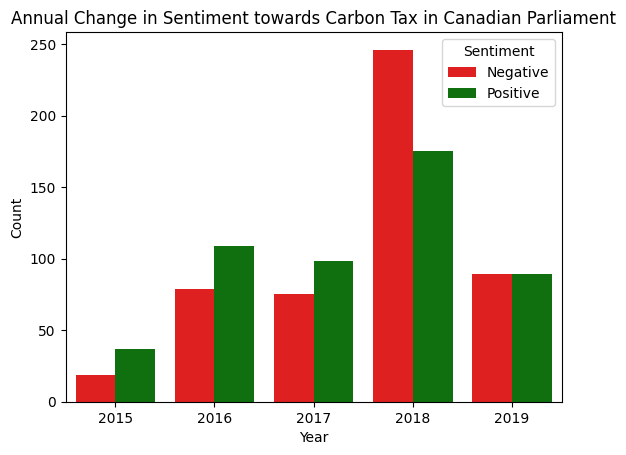

In [31]:
#plot sentiments vs years
sns.countplot(data=df, x='Year', hue='Sentiment', palette=['red', 'green'])
plt.title("Annual Change in Sentiment towards Carbon Tax in Canadian Parliament")
plt.xlabel("Year")
plt.ylabel("Count")

In 2015, 2016 and 2017, there was a more positive sentiment, while in 2018 there was a more negative sentiment about carbon tax. In 2019, it seems to be about equal. Unfortunately, since there are a different number of observations for each year, we can't directly compare annual changes in sentiment.

The dependent variable count measures the number of observations that use negative language regarding the carbon tax. 

Text(0.5, 1.0, 'Sentiment towards Carbon Tax by Party')

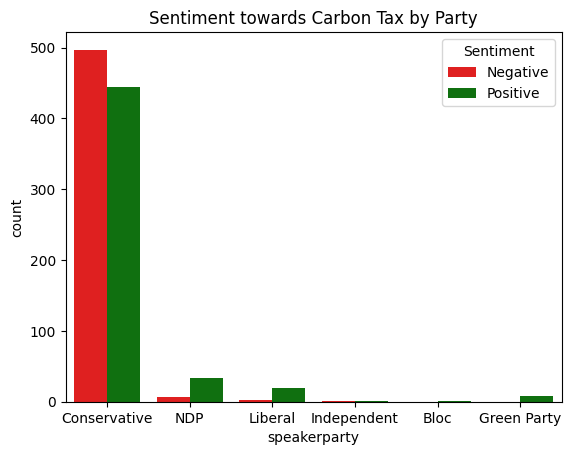

In [34]:
#plot sentimant and party
sns.countplot(data=df, x='speakerparty', hue='Sentiment', palette=['red', 'green']).set_title("Sentiment towards Carbon Tax by Party")

Conservatives are concerned about the carbon tax while the NDP, Liberal and Green Party reference carbon tax policy far less frequently. 
Note that conservatives speak mostly against the tax, while the other parties are more neutral or in favor of the tax, unsurprisingly.

<h1>Joining Datasets</h1>

Now, let's join the 2 datasets. We need something to join them on, so I'm going to use the riding as an indicator of province.

In [35]:
ridings = gpd.read_file('2015-ridings/FED_CA_2_2_ENG.shp')
ridings.head()

,FED_NUM,NID,FEDNUM,ENNAME,FRNAME,PROVCODE,CREADT,REVDT,REPORDER,DECPOPCNT,QUIPOPCNT,ENLEGALDSC,FRLEGALDSC,geometry
0,35029,{30F68311-B8D1-4049-9DA1-88F80222930F},35029,Etobicoke North,Etobicoke-Nord,ON,20131005,None,2013,117601,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((7201954.777 935407.037, 7202067.746 ..."
1,35032,{39AFA153-47AC-4203-87DE-B7A71DF234E9},35032,Guelph,Guelph,ON,20131005,None,2013,121688,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((7151948.911 899971.331, 7151447.129 ..."
2,48017,{C3BC533E-6642-4C06-9291-10C0907A24A6},48017,Edmonton Mill Woods,Edmonton Mill Woods,AB,20131005,None,2013,106103,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((4811379.686 2157147.634, 4811380.094..."
3,48018,{C5BCB32E-57F6-4448-A533-33D114D02386},48018,Edmonton Riverbend,Edmonton Riverbend,AB,20131005,None,2013,106302,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((4801564.891 2159173.746, 4801137.980..."
4,48021,{BBFBC678-2943-48FD-BC75-A259C0060A06},48021,Edmonton--Wetaskiwin,Edmonton--Wetaskiwin,AB,20131005,None,2013,110644,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((4694436.409 2130675.640, 4694437.989..."


In [36]:
#normalize the ridings columns in both datasets
def normalize(x):
    x = x.lower()
    new = ''
    for c in x:
        if ord(c) >= 97 and ord(c) <= 122:
            new += c
    return new

In [37]:
ridings.ENNAME = ridings.ENNAME.apply(normalize)
df.speakerriding = df.speakerriding.apply(normalize)

In [38]:
#change province column in ridings dataset to full name of provinces
def transform(x):
    key = {'ON': 'Ontario', 'AB': 'Alberta', 'QC': 'Quebec', 'YT': 'Yukon', 'NU': 'Nunavut', 'NT': 'Northwest Territories',
           'SK': 'Saskatchewan', 'BC': 'British Columbia', 'MB': 'Manitoba', 'PE': 'Prince Edward Island',
           'NL': 'Newfoundland and Labrador', 'NS': 'Nova Scotia', 'NB': 'New Brunswick'}
    return key[x]

ridings.PROVCODE = ridings.PROVCODE.apply(transform)

In [39]:
#merge the datasets
df_prov = df.merge(ridings, left_on='speakerriding', right_on='ENNAME', how='inner')
df_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   speakerparty   1016 non-null   object  
 1   speakerriding  1016 non-null   object  
 2   Sentiment      1016 non-null   object  
 3   Year           1016 non-null   int64   
 4   FED_NUM        1016 non-null   int64   
 5   NID            1016 non-null   object  
 6   FEDNUM         1016 non-null   int64   
 7   ENNAME         1016 non-null   object  
 8   FRNAME         1016 non-null   object  
 9   PROVCODE       1016 non-null   object  
 10  CREADT         1016 non-null   object  
 11  REVDT          177 non-null    object  
 12  REPORDER       1016 non-null   object  
 13  DECPOPCNT      1016 non-null   int64   
 14  QUIPOPCNT      1016 non-null   int64   
 15  ENLEGALDSC     1016 non-null   object  
 16  FRLEGALDSC     1016 non-null   object  
 17  geometry       1016 non-null   ge

In [40]:
#only keep relevant columns
df_prov = df_prov.iloc[:, [0,2,3,9]]
df_prov.isna().sum()

speakerparty    0
Sentiment       0
Year            0
PROVCODE        0
dtype: int64

In [41]:
df_prov.shape

(1016, 4)

In [42]:
df_joined = df_prov.merge(new_carbon_df, left_on=['Year', 'PROVCODE'], right_on=['year', 'province'], how='outer')
df_joined.head()

,speakerparty,Sentiment,Year,PROVCODE,year,province,federal_party,co2_tonnes,emissions
0,Conservative,Positive,2015.0,Alberta,2015,Alberta,Conservative,1.360464e+08,1.360464
1,Conservative,Negative,2015.0,Alberta,2015,Alberta,Conservative,1.360464e+08,1.360464
2,Conservative,Negative,2015.0,British Columbia,2015,British Columbia,Liberal,1.191452e+07,0.119145
3,Conservative,Negative,2015.0,British Columbia,2015,British Columbia,Liberal,1.191452e+07,0.119145
4,Conservative,Negative,2015.0,British Columbia,2015,British Columbia,Liberal,1.191452e+07,0.119145


In [43]:
df_joined.isna().sum()

speakerparty     33
Sentiment        33
Year             33
PROVCODE         33
year              0
province          0
federal_party     0
co2_tonnes        0
emissions         0
dtype: int64

The nulls arise from the fact that not all provinces had members making statements about the carbon tax in certain years, which is fine. However, since we want to investigate the relationship between the province's sentiment and its emissions, the null entries don't give us any additional value. Also, there are only 33 rows with null values, so simply dropping them shouldn't be too big of a problem.

In [44]:
df_joined.dropna(inplace=True)
df_joined.shape

(1016, 9)

In [45]:
df_joined = df_joined.iloc[:, [0,1,4,5,6,7]]
df_joined.head()

,speakerparty,Sentiment,year,province,federal_party,co2_tonnes
0,Conservative,Positive,2015,Alberta,Conservative,1.360464e+08
1,Conservative,Negative,2015,Alberta,Conservative,1.360464e+08
2,Conservative,Negative,2015,British Columbia,Liberal,1.191452e+07
3,Conservative,Negative,2015,British Columbia,Liberal,1.191452e+07
4,Conservative,Negative,2015,British Columbia,Liberal,1.191452e+07


Now, time to visualize.

Text(0.5, 1.0, 'Sentiment towards Carbon Tax by Province')

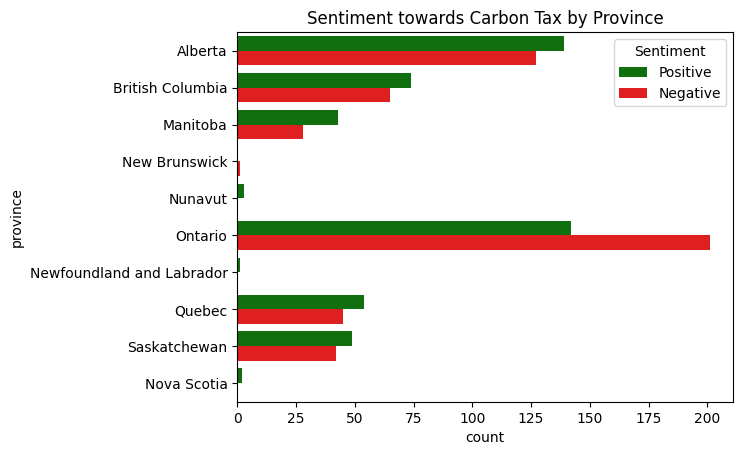

In [48]:
#plot provincial sentiments
sns.countplot(data=df_joined, y='province', hue='Sentiment', palette=['green', 'red']).set_title("Sentiment towards Carbon Tax by Province")

Ontario is the only province with negative sentiment; all the other provinces seem to have overall positive sentiment about the carbon tax. However it is important to note that Ontario has the largest population in Canada, so it is not surprising that there is a larger number of observations.

Text(0.5, 1.0, 'Sentiment towards Carbon Tax by Party')

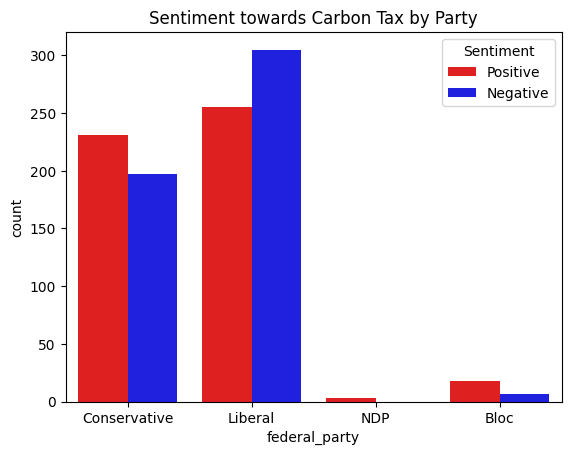

In [50]:
#plot party-wise sentiment
sns.countplot(data=df_joined, x='federal_party', hue='Sentiment', palette=['red', 'blue']).set_title("Sentiment towards Carbon Tax by Party")

This graph is saying that the Liberals were speaking against the carbon tax, while the Conservatives were speaking for. However, this does not make sense as the Liberals WANTED the policy. This graph uses provincial party, but the graph above (which realistically makes more sense) uses the speaker's party. It makes sense that we can't generalize one province per party, as we don't really know how many seats were won by different parties in each province.

<h1>Modeling</h1>

<h2>Model 1: Emissions ~ Year</h2>

In [51]:
new_carbon_df

,year,province,federal_party,co2_tonnes,emissions
0,2015,Alberta,Conservative,1.360464e+08,1.360464
1,2015,British Columbia,Liberal,1.191452e+07,0.119145
2,2015,Manitoba,Conservative,1.490384e+06,0.014904
3,2015,New Brunswick,Liberal,7.146915e+06,0.071469
4,2015,Newfoundland and Labrador,Liberal,4.673263e+06,0.046733
...,...,...,...,...,...
60,2019,Ontario,Liberal,4.049800e+07,0.404980
61,2019,Prince Edward Island,Liberal,6.042595e+04,0.000604
62,2019,Quebec,Bloc,1.964496e+07,0.196450
63,2019,Saskatchewan,Conservative,2.720941e+07,0.272094


In [52]:
model_data = new_carbon_df.groupby('year').agg({'emissions': 'sum'})
model_data

,emissions
year,
2015,2.485905
2016,2.487556
2017,2.717580
2018,2.734328
2019,2.735401


In [53]:
x = np.array(model_data.index).reshape(-1,1)
y = model_data.emissions
model = LinearRegression().fit(x, y)

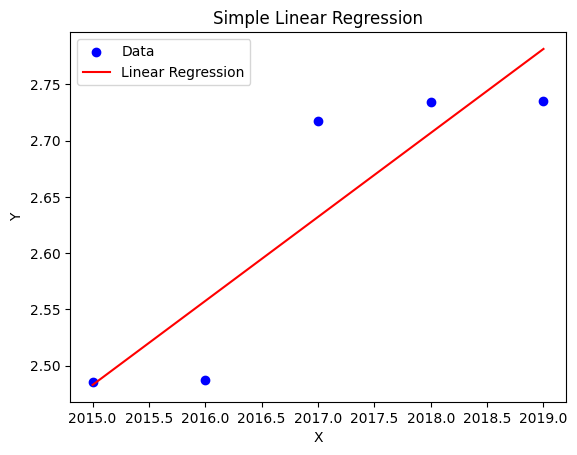

In [54]:
#get predictions
y_pred = model.predict(np.array([2015, 2016, 2017, 2018, 2019]).reshape(-1,1))

#plot the actual vs predicted
plt.scatter(x, y, color='blue', label='Data')  # Plot original data
plt.plot(x, y_pred, color='red', label='Linear Regression')  # Plot regression line
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [129]:
#inspect RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

0.0549142506006486

The RMSE is ~0.05, which means the average prediction error is about 5,000,000 tonnes of CO2. Considering our scale is in several hundreds of millions of tonnes, the model isn't too bad. However, more data would be helpful to realize a significant improvement.

### Conclusion 
To conclude, the data does not show a significant relationship between the carbon tax policy and the reduction of greenhouse gas emissions. The carbon tax policy was implemented in 2015, and the data shows that the emissions have remained relatively stable since then. The data also shows that the sentiment about the carbon tax policy has been mostly positive, which suggests that the policy has not had a significant impact on the reduction of greenhouse gas emissions. The data also shows that the provinces with the highest emissions are also the ones with the most negative sentiment about the carbon tax policy. This suggests that the carbon tax policy has not been effective in reducing emissions in these provinces. Overall, the data does not show a significant relationship between the carbon tax policy and the reduction of greenhouse gas emissions.

Some challenges we faced were the lack of data for certain years and provinces, which made it difficult to compare the sentiment and emissions across different provinces and years. Another challenge was the lack of a clear definition of what constitutes a negative sentiment about the carbon tax policy. We had to use a simple keyword search to identify negative sentiment, which may not accurately capture the true sentiment of the speaker. Despite these challenges, we were able to analyze the data and draw some conclusions about the relationship between the carbon tax policy and the reduction of greenhouse gas emissions.

To improve this analysis, we could incorporate other data sources to measure the effectiveness of the carbon tax policy including government spending, public opinion, and the climate act rebate. We could also use more advanced natural language processing techniques to analyze the sentiment of the speakers more accurately. Overall, this analysis provides some insights into the relationship between the carbon tax policy and the reduction of greenhouse gas emissions, but further research is needed to draw more definitive conclusions.